In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from seaborn import heatmap
import re

In [4]:
br = pd.read_csv("D:/Project/ML/Dataset/newplayer.csv")
br

,ID,Player_ID,Player,Country,Opposition,Bat1,Runs,BF,SR,4s,6s,Ground,Start Date,Match_ID,Team Runs,Target,Overs,RPO,Inns,Result
0,6,49619,Oshane Thomas,WestIndies,v India,0*,0,8,0.00,0,0,Dhaka,10 Jan 2010,ODI # 2941,NaN,NaN,NaN,NaN,NaN,NaN
1,10,49619,Oshane Thomas,WestIndies,v England,1*,1,3,33.33,0,0,Nottingham,6 Jul 2011,ODI # 3169,NaN,NaN,NaN,NaN,NaN,NaN
2,11,49619,Oshane Thomas,WestIndies,v Australia,0*,0,2,0.00,0,0,Pallekele,10 Aug 2011,ODI # 3175,NaN,NaN,NaN,NaN,NaN,NaN
3,12,49619,Oshane Thomas,WestIndies,v Pakistan,0,0,2,0.00,0,0,Dubai (DSC),11 Nov 2011,ODI # 3212,NaN,NaN,NaN,NaN,NaN,NaN
4,14,49619,Oshane Thomas,WestIndies,v Pakistan,0,0,4,0.00,0,0,Dhaka,15 Mar 2012,ODI # 3260,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8813,11143,352048,Gulbadin Naib,Afghanistan,v Bangladesh,0*,0,2,0.00,0,0,Abu Dhabi,23 Sep 2018,ODI # 4045,249/7,NaN,50.0,4.98,1.0,won
8814,11144,352048,Gulbadin Naib,Afghanistan,v India,15,15,46,32.60,1,0,Dubai (DSC),25 Sep 2018,ODI # 4046,252,253.0,49.5,5.05,2.0,tied
8815,11145,352048,Gulbadin Naib,Afghanistan,v Ireland,46,46,61,75.40,6,1,Dehradun,28 Feb 2019,ODI # 4100,165/5,162.0,41.5,3.94,2.0,won
8816,11146,352048,Gulbadin Naib,Afghanistan,v Ireland,3,3,6,50.00,0,0,Dehradun,2 Mar 2019,ODI # 4101,250/7,NaN,48.3,5.15,1.0,n/r


In [5]:
br['Opposition'] = br['Opposition'].str.replace('v ', '')
br.dropna(inplace=True)
br

,ID,Player_ID,Player,Country,Opposition,Bat1,Runs,BF,SR,4s,6s,Ground,Start Date,Match_ID,Team Runs,Target,Overs,RPO,Inns,Result
7,18,49619,Oshane Thomas,WestIndies,Pakistan,1*,1,1,100.00,0,0,Sharjah,18 Dec 2013,ODI # 3445,311,323.0,49.4,6.26,2.0,lost
9,27,49619,Oshane Thomas,WestIndies,England,4*,4,5,80.00,0,0,The Oval,22 May 2014,ODI # 3492,144,226.0,27.5,5.17,2.0,lost
10,30,49619,Oshane Thomas,WestIndies,New Zealand,0,0,3,0.00,0,0,Dunedin,23 Jan 2015,ODI # 3588,252,361.0,43.4,5.77,2.0,lost
11,31,49619,Oshane Thomas,WestIndies,New Zealand,3,3,5,60.00,0,0,Dunedin,25 Jan 2015,ODI # 3590,195,316.0,40.3,4.81,2.0,lost
12,32,49619,Oshane Thomas,WestIndies,New Zealand,7*,7,17,41.17,0,0,Christchurch,14 Feb 2015,ODI # 3599,233,332.0,46.1,5.04,2.0,lost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8810,11140,352048,Gulbadin Naib,Afghanistan,Sri Lanka,4,4,5,80.00,0,0,Abu Dhabi,17 Sep 2018,ODI # 4038,158,250.0,41.2,3.82,2.0,lost
8811,11141,352048,Gulbadin Naib,Afghanistan,Bangladesh,42*,42,38,110.52,5,0,Abu Dhabi,20 Sep 2018,ODI # 4041,119,256.0,42.1,2.82,2.0,lost
8812,11142,352048,Gulbadin Naib,Afghanistan,Pakistan,10*,10,7,142.85,1,0,Abu Dhabi,21 Sep 2018,ODI # 4043,258/7,258.0,49.3,5.21,2.0,won
8814,11144,352048,Gulbadin Naib,Afghanistan,India,15,15,46,32.60,1,0,Dubai (DSC),25 Sep 2018,ODI # 4046,252,253.0,49.5,5.05,2.0,tied


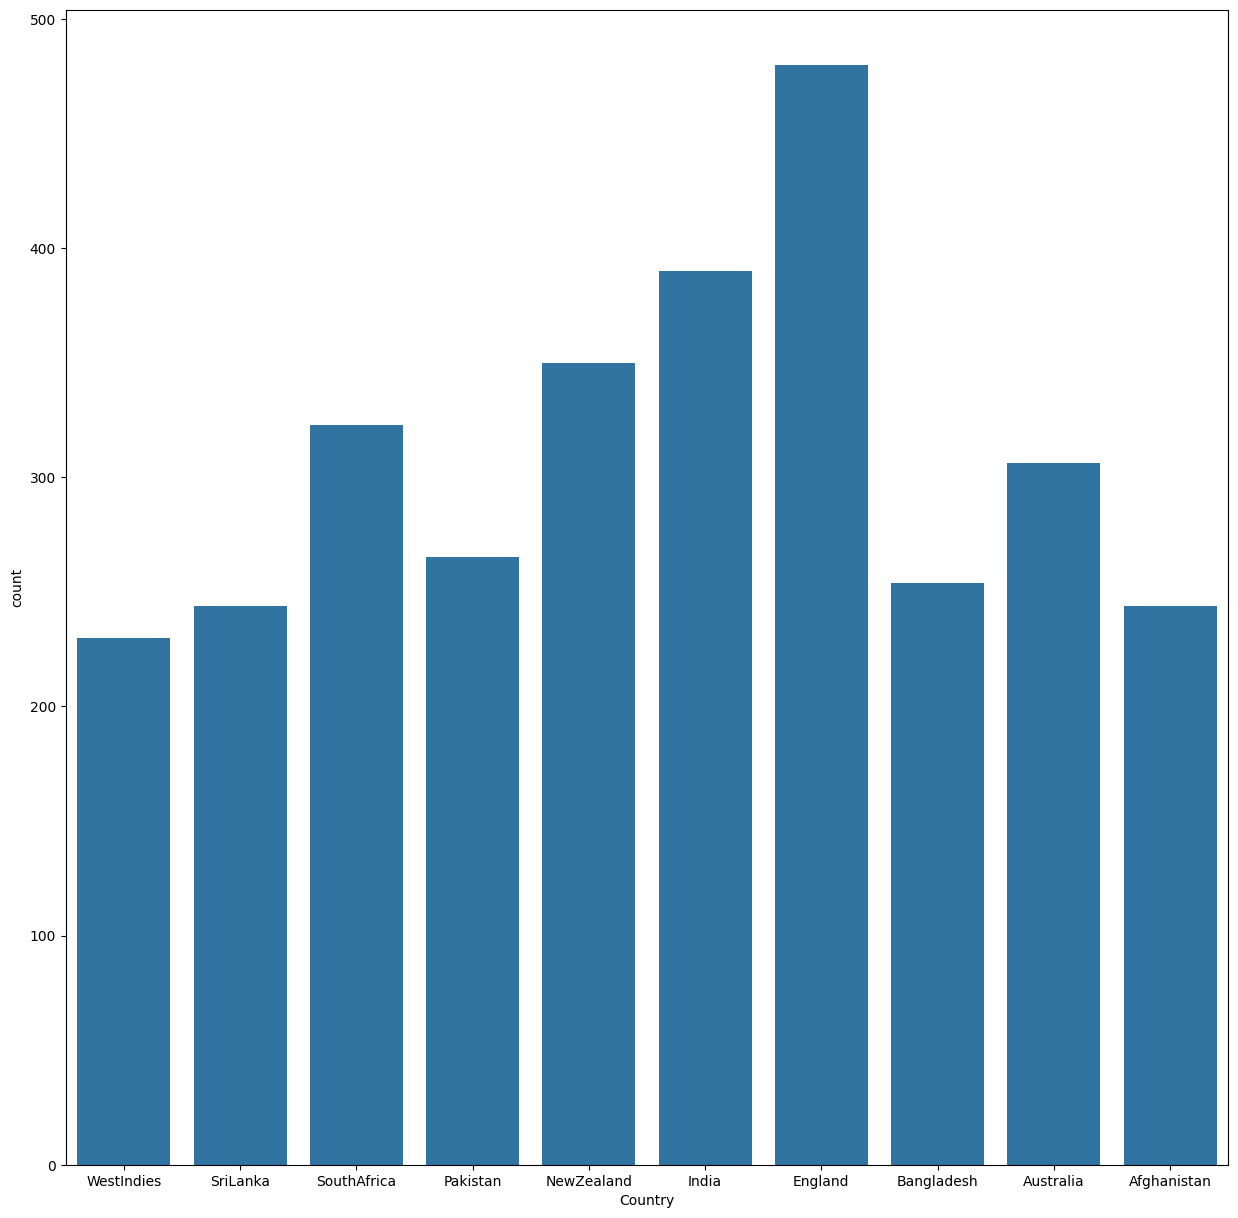

In [6]:
plt.figure(figsize=(15,15))
sns.countplot(x='Country', data=br)
plt.show()

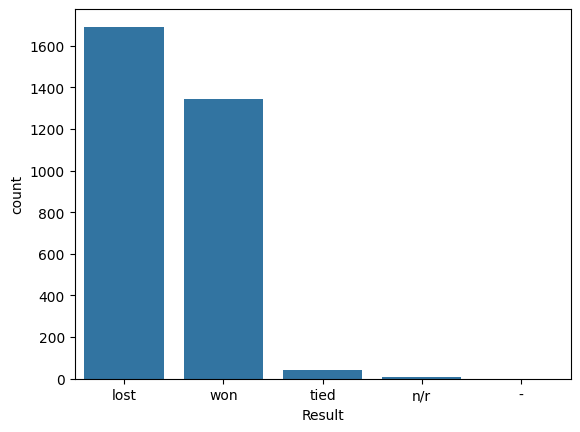

In [7]:
sns.countplot(x='Result', data=br)
plt.show()

In [8]:
new = br[(br['Result'] == 'lost') & (br['Player'] == 'Andre Russell')]
c = br['Country'].unique()
c

array(['WestIndies', 'SriLanka', 'SouthAfrica', 'Pakistan', 'NewZealand',
       'India', 'England', 'Bangladesh', 'Australia', 'Afghanistan'],
      dtype=object)

In [9]:
v = br[br['Runs'] > 150]
arrnp = v['Player'].values
runs = v['Runs'].tolist()
players = v['Player'].tolist()
print(players)
print(runs)

['Chris Gayle ', 'Hashim Amla', 'Hashim Amla', 'Quinton de Kock ', 'Quinton de Kock ', 'Faf du Plessis ', 'Ross Taylor', 'Martin Guptill', 'Rohit Sharma ', 'Rohit Sharma ', 'Rohit Sharma ', 'Virat Kohli ', 'Virat Kohli ', 'Jason Roy', 'Alex Hales', 'David Warner', 'David Warner', 'Steve Smith']
[162, 153, 154, 178, 168, 185, 181, 237, 264, 208, 162, 160, 157, 180, 171, 156, 179, 164]


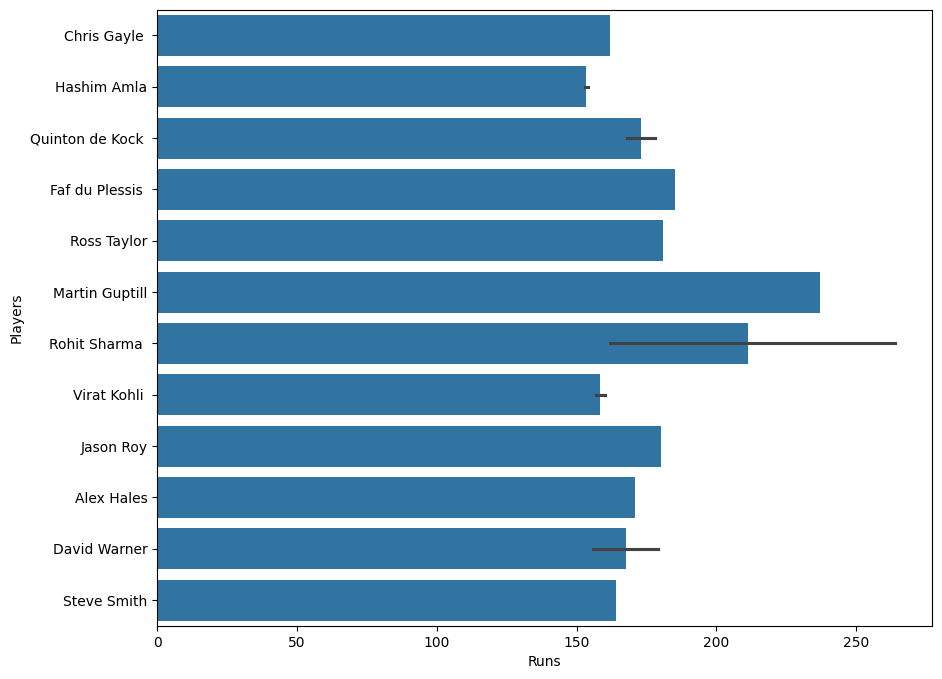

In [10]:
plt.figure(figsize=(10, 8))
sns.barplot(y=players, x=runs)
plt.xlabel("Runs")
plt.ylabel("Players")
plt.show()

In [11]:
countries = c.tolist()
won = br[br['Result'] == 'won']
lost = br[br['Result'] == 'lost']

In [13]:
woncount = [won[won['Country'] == country]['Result'].count() for country in countries]
print("Win counts by country:\n", dict(zip(countries, woncount)))

Win counts by country:
 {'WestIndies': np.int64(57), 'SriLanka': np.int64(76), 'SouthAfrica': np.int64(121), 'Pakistan': np.int64(100), 'NewZealand': np.int64(130), 'India': np.int64(168), 'England': np.int64(252), 'Bangladesh': np.int64(164), 'Australia': np.int64(141), 'Afghanistan': np.int64(134)}


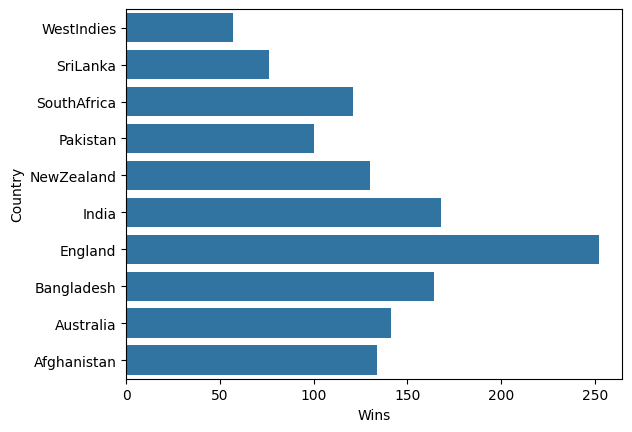

In [14]:
sns.barplot(y=countries, x=woncount)
plt.xlabel("Wins")
plt.ylabel("Country")
plt.show()

In [15]:
lostcount = [lost[lost['Country'] == country]['Result'].count() for country in countries]
print("Loss counts by country:\n", dict(zip(countries, lostcount)))

Loss counts by country:
 {'WestIndies': np.int64(159), 'SriLanka': np.int64(168), 'SouthAfrica': np.int64(198), 'Pakistan': np.int64(163), 'NewZealand': np.int64(217), 'India': np.int64(208), 'England': np.int64(227), 'Bangladesh': np.int64(90), 'Australia': np.int64(160), 'Afghanistan': np.int64(101)}


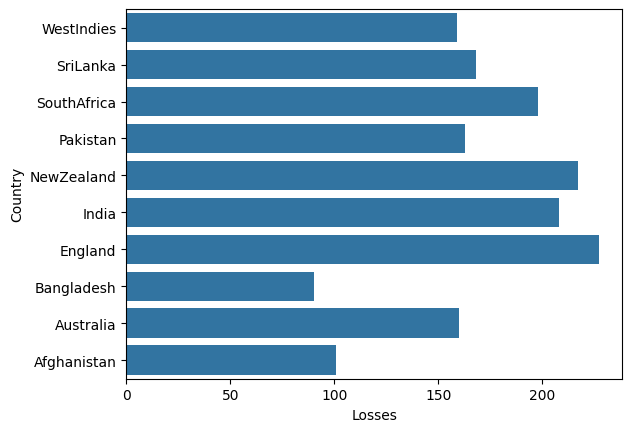

In [16]:
sns.barplot(y=countries, x=lostcount)
plt.xlabel("Losses")
plt.ylabel("Country")
plt.show()

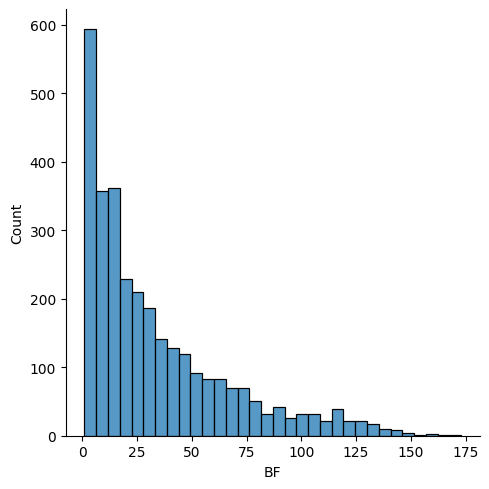

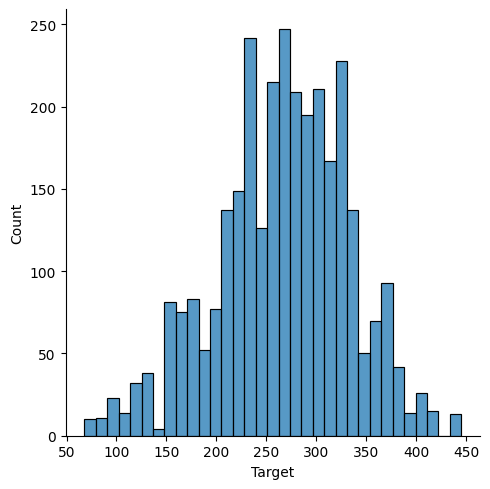

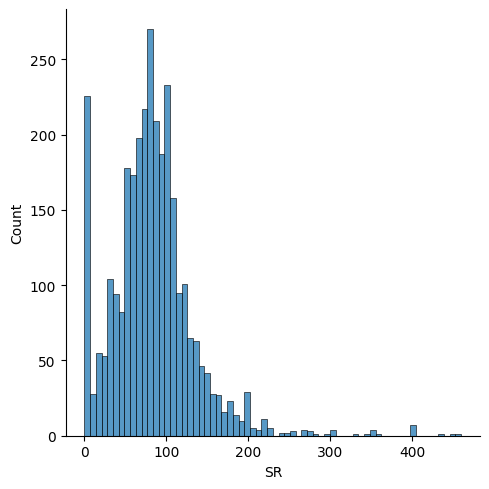

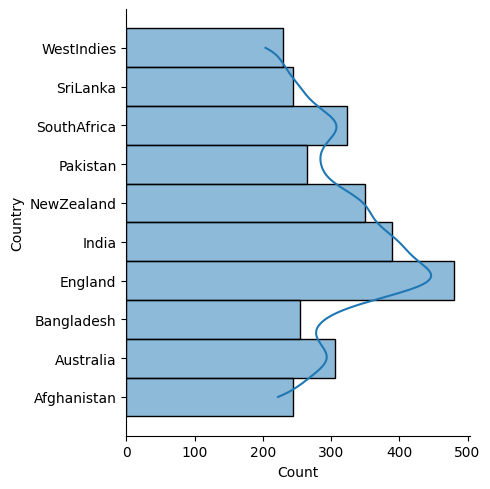

In [17]:
sns.displot(br['BF'])
sns.displot(br['Target'])
sns.displot(br['SR'])
sns.displot(y=br['Country'],kde=True)
plt.show()

In [18]:
br = br[br['Overs'] >= 5.0]
newbr = br.drop(columns=['ID', 'Country', 'Bat1', 'Ground', 'Start Date', 'Match_ID'])
print("Filtered dataset with overs >= 5 and selected columns:\n", newbr.head())

Filtered dataset with overs >= 5 and selected columns:
     Player_ID         Player   Opposition  Runs  BF      SR  4s  6s Team Runs  \
7       49619  Oshane Thomas     Pakistan     1   1  100.00   0   0       311   
9       49619  Oshane Thomas      England     4   5   80.00   0   0       144   
10      49619  Oshane Thomas  New Zealand     0   3    0.00   0   0       252   
11      49619  Oshane Thomas  New Zealand     3   5   60.00   0   0       195   
12      49619  Oshane Thomas  New Zealand     7  17   41.17   0   0       233   

    Target  Overs   RPO  Inns Result  
7    323.0   49.4  6.26   2.0   lost  
9    226.0   27.5  5.17   2.0   lost  
10   361.0   43.4  5.77   2.0   lost  
11   316.0   40.3  4.81   2.0   lost  
12   332.0   46.1  5.04   2.0   lost  


In [19]:
newbr['Team Runs'] = newbr['Team Runs'].str.replace('/', '.').astype(float)
newbr['Inns'] = newbr['Inns'].astype(float)
newbr['RPO'] = newbr['RPO'].astype(float)
print("Converted 'Team Runs', 'Inns', and 'RPO' to float:\n", newbr.head())

Converted 'Team Runs', 'Inns', and 'RPO' to float:
     Player_ID         Player   Opposition  Runs  BF      SR  4s  6s  \
7       49619  Oshane Thomas     Pakistan     1   1  100.00   0   0   
9       49619  Oshane Thomas      England     4   5   80.00   0   0   
10      49619  Oshane Thomas  New Zealand     0   3    0.00   0   0   
11      49619  Oshane Thomas  New Zealand     3   5   60.00   0   0   
12      49619  Oshane Thomas  New Zealand     7  17   41.17   0   0   

    Team Runs  Target  Overs   RPO  Inns Result  
7       311.0   323.0   49.4  6.26   2.0   lost  
9       144.0   226.0   27.5  5.17   2.0   lost  
10      252.0   361.0   43.4  5.77   2.0   lost  
11      195.0   316.0   40.3  4.81   2.0   lost  
12      233.0   332.0   46.1  5.04   2.0   lost  


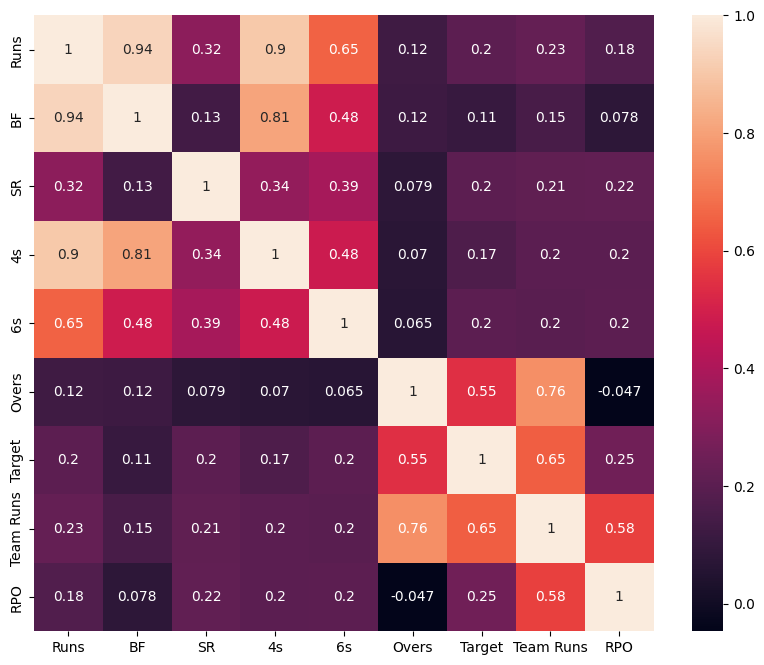

In [20]:
heatbr = newbr[['Runs', 'BF', 'SR', '4s', '6s', 'Overs', 'Target', 'Team Runs', 'RPO']]
plt.figure(figsize=(10, 8))
heatmap(data=heatbr.corr(), annot=True)
plt.show()

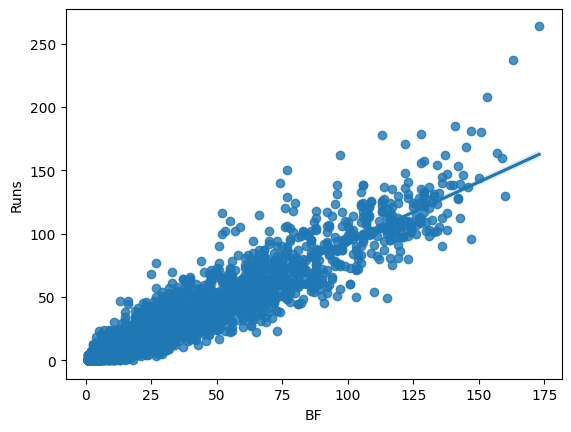

In [21]:
sns.regplot(x='BF', y='Runs', data=heatbr)
plt.show()

In [22]:
dummies = pd.get_dummies(newbr[['Player', 'Opposition']], prefix='', prefix_sep='')
final = pd.concat([newbr, dummies], axis=1).drop(['Player', 'Opposition', 'Result', 'Inns', '4s', '6s', 'SR', 'RPO', 'Team Runs', 'Target'], axis=1)
print("Final dataset after one-hot encoding:\n", final.head())

Final dataset after one-hot encoding:
     Player_ID  Runs  BF  Overs  Aaron Finch   Abid Ali  Adam Zampa  \
7       49619     1   1   49.4         False     False       False   
9       49619     4   5   27.5         False     False       False   
10      49619     0   3   43.4         False     False       False   
11      49619     3   5   40.3         False     False       False   
12      49619     7  17   46.1         False     False       False   

    Adil Rashid  Aftab Alam  Aiden Markram  ...  Kenya  New Zealand  P.N.G.  \
7         False       False          False  ...  False        False   False   
9         False       False          False  ...  False        False   False   
10        False       False          False  ...  False         True   False   
11        False       False          False  ...  False         True   False   
12        False       False          False  ...  False         True   False   

    Pakistan  Scotland  South Africa  Sri Lanka  U.A.E.  West Ind

In [23]:
# Verify the columns present in 'final'
print("Available columns in final:", final.columns)

# Select specific columns for player, opposition, and features
# Using 'Virat Kohli' and 'Pakistan' as examples from the column names in final
demo = final[['Virat Kohli ','Pakistan','Runs','BF','Overs']]  # Replace these names as per actual data

# Define features (X) and target (Y)
X = demo.drop(['Runs'], axis=1)  # Features (excluding 'Runs')
Y = demo['Runs']  # Target variable (Runs)

print("Training and test data prepared.")


Available columns in final: Index(['Player_ID', 'Runs', 'BF', 'Overs', 'Aaron Finch ', 'Abid Ali',
       'Adam Zampa', 'Adil Rashid', 'Aftab Alam', 'Aiden Markram',
       ...
       'Kenya', 'New Zealand', 'P.N.G.', 'Pakistan', 'Scotland',
       'South Africa', 'Sri Lanka', 'U.A.E.', 'West Indies', 'Zimbabwe'],
      dtype='object', length=168)
Training and test data prepared.


In [24]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.20, random_state=42)

In [25]:
comp = {}

In [26]:
tree = DecisionTreeRegressor()
tree.fit(train_X, train_Y)
comp['Decision Tree'] = tree.score(test_X, test_Y)
print("Decision Tree Regressor score:", comp['Decision Tree'])

Decision Tree Regressor score: 0.7734131035653375


In [27]:
knr = KNeighborsRegressor()
knr.fit(train_X, train_Y)
comp['K-Neighbors'] = knr.score(test_X, test_Y)
print("K-Neighbors Regressor score:", comp['K-Neighbors'])

K-Neighbors Regressor score: 0.8618241835871634


In [28]:
xgb = XGBRegressor()
xgb.fit(train_X, train_Y)
comp['XGBoost'] = xgb.score(test_X, test_Y)
print("XGBoost Regressor score:", comp['XGBoost'])

XGBoost Regressor score: 0.8466278314590454


In [29]:
forest = RandomForestRegressor()
forest.fit(train_X, train_Y)
comp['Random Forest'] = forest.score(test_X, test_Y)
print("Random Forest Regressor score:", comp['Random Forest'])


Random Forest Regressor score: 0.8461577678223752


In [30]:
lr = LinearRegression()
lr.fit(train_X, train_Y)
comp['Linear Regression'] = lr.score(test_X, test_Y)
print("Linear Regression score:", comp['Linear Regression'])

Linear Regression score: 0.8861654726083956


In [31]:
svr = SVR()
svr.fit(train_X, train_Y)
comp['Support Vector'] = svr.score(test_X, test_Y)
print("Support Vector Regressor score:", comp['Support Vector'])


Support Vector Regressor score: 0.8467254215492531


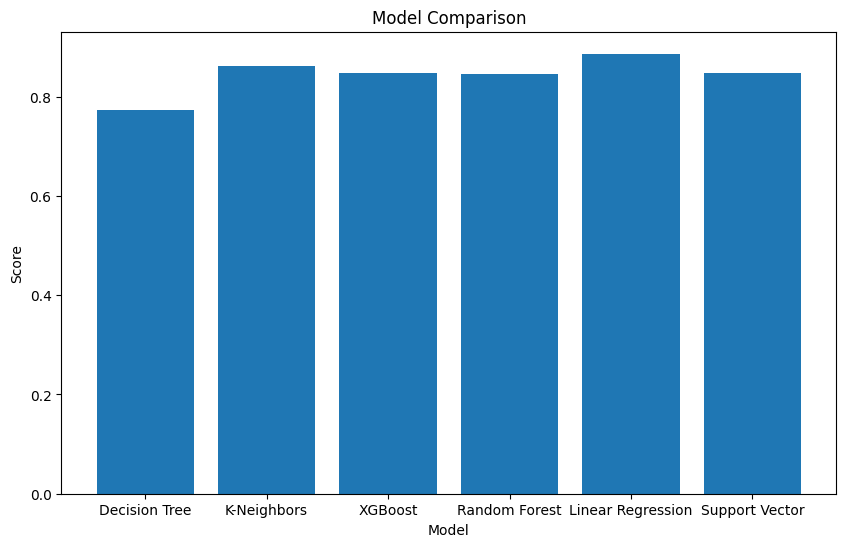

In [32]:
plt.figure(figsize=(10, 6))
plt.bar(comp.keys(), comp.values())
plt.xlabel("Model")
plt.ylabel("Score")
plt.title("Model Comparison")
plt.show()


In [ ]:
player = input('Enter player name: ')
opposition = input('Enter opposition team: ')
bf = float(input('Enter balls faced: '))
overs = float(input('Enter overs faced: '))
tree.fit(train_X, train_Y)
prediction = tree.predict([[1, 1, bf, overs]])
print(f"{player}'s predicted runs against {opposition}: {int(prediction[0])}")

In [ ]:
tree.score(test_X,test_Y)

0.7709883735894685